#Import Module

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machine _earning(CSV file)/PROJECT_compressive_strength_of_concrete/concrete_data.csv")

In [2]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df=df.rename(columns={'cement':'cement','blast_furnace_slag':'slag','fly_ash':'ash','water':'water','superplasticizer':'superplastic','coarse_aggregate':'coarseagg','fine_aggregate ':'fine_aggregate','age':'age','concrete_compressive_strength':'strength'})

In [4]:
df.tail()


,cement,slag,ash,water,superplastic,coarseagg,fine_aggregate,age,strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fine_aggregate', 'age', 'strength'],
      dtype='object')

In [6]:
df.dtypes

cement            float64
slag              float64
ash               float64
water             float64
superplastic      float64
coarseagg         float64
fine_aggregate    float64
age                 int64
strength          float64
dtype: object

In [7]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fine_aggregate,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.shape

(1030, 9)

In [9]:
df.isnull().sum()

cement            0
slag              0
ash               0
water             0
superplastic      0
coarseagg         0
fine_aggregate    0
age               0
strength          0
dtype: int64

#Exploring the Data Analysis
cement


In [10]:
from scipy import stats
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['cement']))

1st quartile (Q1 is:) 192.375
2nd quartile(Q3) is: 350.0
interquartile range(iqr) is  157.625


In [11]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in cement",L_outliers)
print("upper outlier limit in cement",U_outliers)

lower outlier limit in cement -44.0625
upper outlier limit in cement 428.8125


In [12]:
print("the number of outlier in cement upper :",df[df['cement']>428.8125]['cement'].count())
print("the number of outlier in cement lower :",df[df['cement']<-44.0625]['cement'].count())

the number of outlier in cement upper : 96
the number of outlier in cement lower : 0


#distrubution of cement

<Axes: xlabel='cement'>

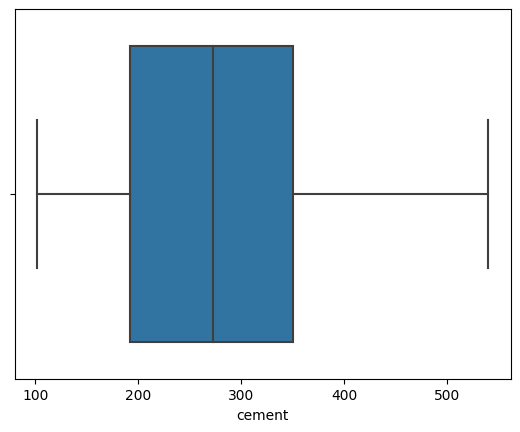

In [13]:
import seaborn as sns
sns.boxplot(x='cement',data=df,orient='h')


<ipython-input-14-28070b18ad73>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash']).set_title('ash')


Text(0.5, 1.0, 'ash')

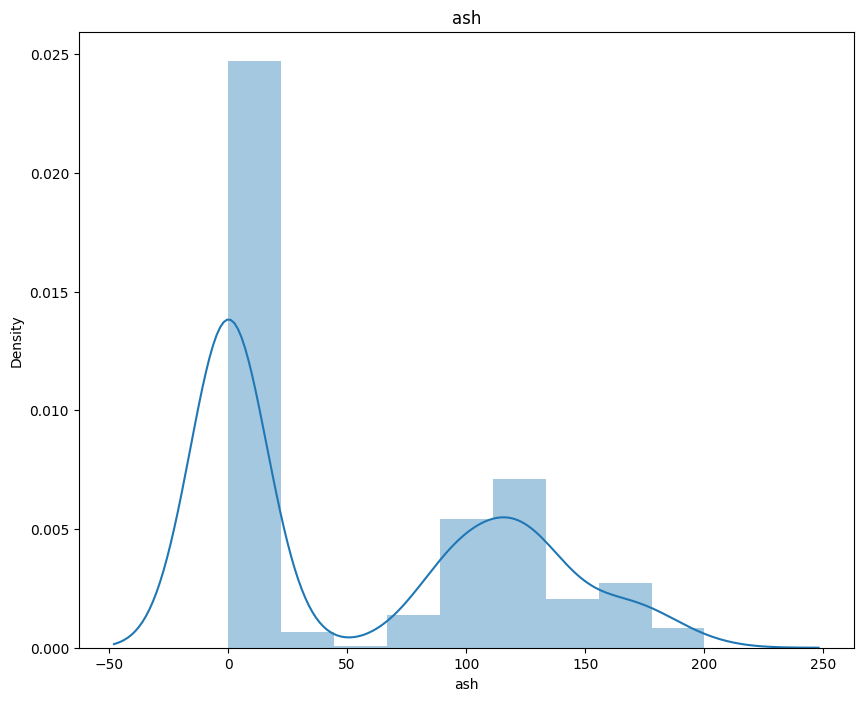

In [14]:
#displot
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('ash')

#water

In [15]:
Q1=df['water'].quantile(q=0.25)
Q3=df['water'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['water']))

1st quartile (Q1 is:) 164.9
2nd quartile(Q3) is: 192.0
interquartile range(iqr) is  27.099999999999994


In [16]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in cement",L_outliers)
print("upper outlier limit in cement",U_outliers)

lower outlier limit in cement 124.25000000000001
upper outlier limit in cement 205.55


In [17]:
print("the number of outlier in water upper :",df[df['water']>205.55]['water'].count())
print("the number of outlier in water lower :",df[df['water']<12]['water'].count())

the number of outlier in water upper : 91
the number of outlier in water lower : 0


#Distrubution of water

<ipython-input-18-0e08020b3d34>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['water']).set_title('water')


Text(0.5, 1.0, 'water')

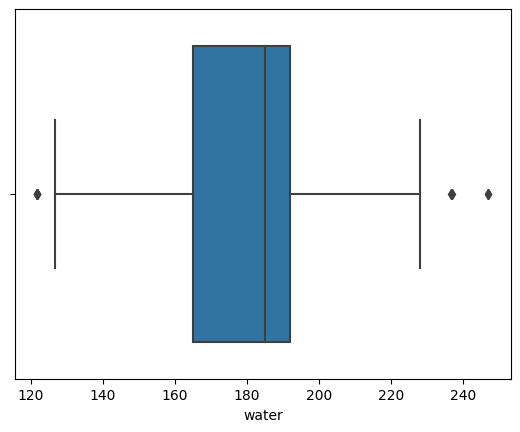

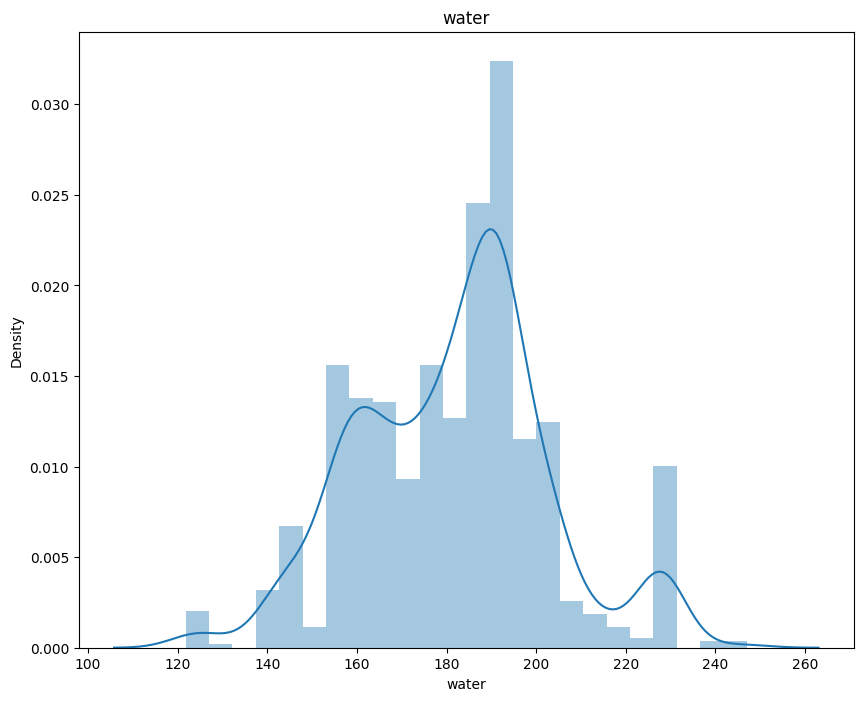

In [18]:
sns.boxplot(x='water',data=df,orient='h')
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title('water')


#slag

In [19]:
Q1=df['slag'].quantile(q=0.25)
Q3=df['slag'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['slag']))

1st quartile (Q1 is:) 0.0
2nd quartile(Q3) is: 142.95
interquartile range(iqr) is  142.95


In [20]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in slag",L_outliers)
print("upper outlier limit in salg",U_outliers)

lower outlier limit in slag -214.42499999999998
upper outlier limit in salg 214.42499999999998


In [21]:
print("the number of outlier in slag upper :",df[df['slag']>214.42499]['slag'].count())
print("the number of outlier in slag lower :",df[df['slag']<-214.42499]['slag'].count())

the number of outlier in slag upper : 57
the number of outlier in slag lower : 0


<ipython-input-22-168d9c524119>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag']).set_title('slag')


Text(0.5, 1.0, 'slag')

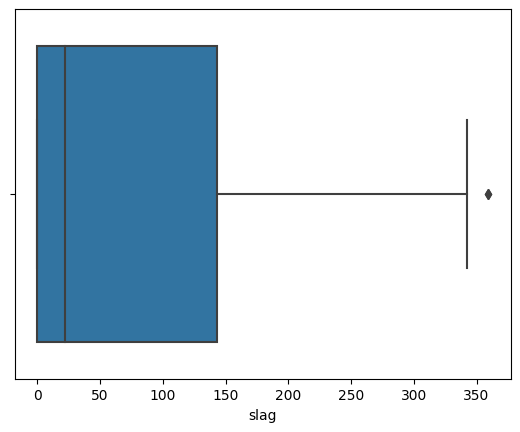

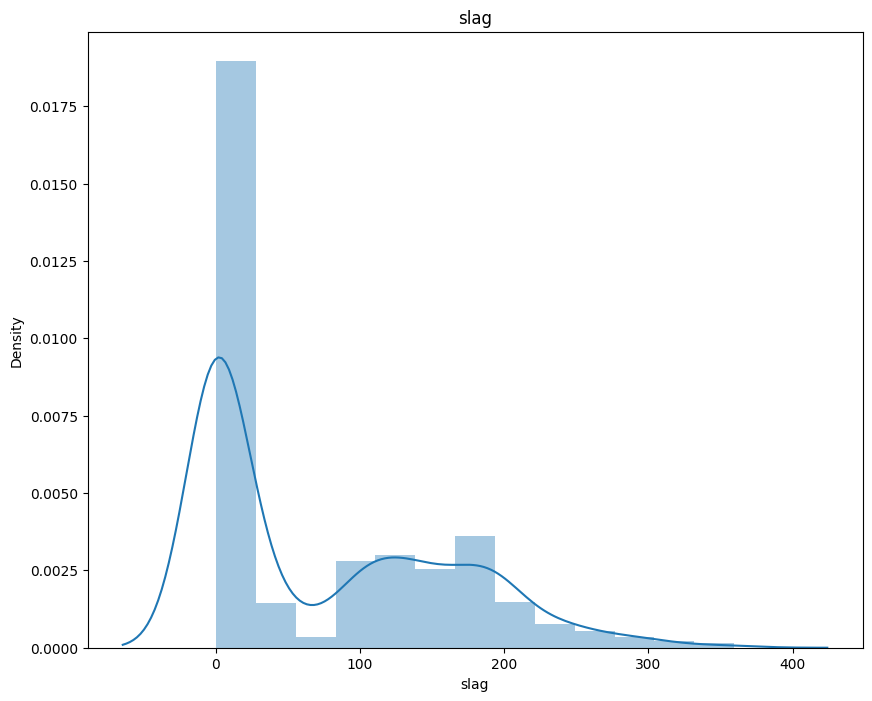

In [22]:
sns.boxplot(x='slag',data=df,orient='h')
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title('slag')

#Age

In [23]:
Q1=df['age'].quantile(q=0.25)
Q3=df['age'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['slag']))

1st quartile (Q1 is:) 7.0
2nd quartile(Q3) is: 56.0
interquartile range(iqr) is  142.95


In [24]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in age",L_outliers)
print("upper outlier limit in age",U_outliers)

lower outlier limit in age -66.5
upper outlier limit in age 80.5


In [25]:
print("the number of outlier in slag upper :",df[df['age']>80.5]['age'].count())
print("the number of outlier in slag lower :",df[df['age']<-66.5]['age'].count())

the number of outlier in slag upper : 190
the number of outlier in slag lower : 0


<ipython-input-26-a974b77a603a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']).set_title('age')


Text(0.5, 1.0, 'age')

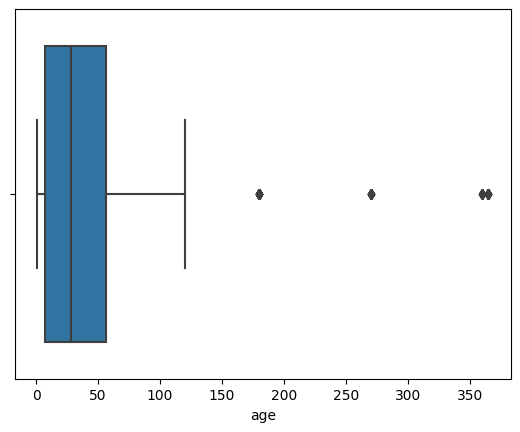

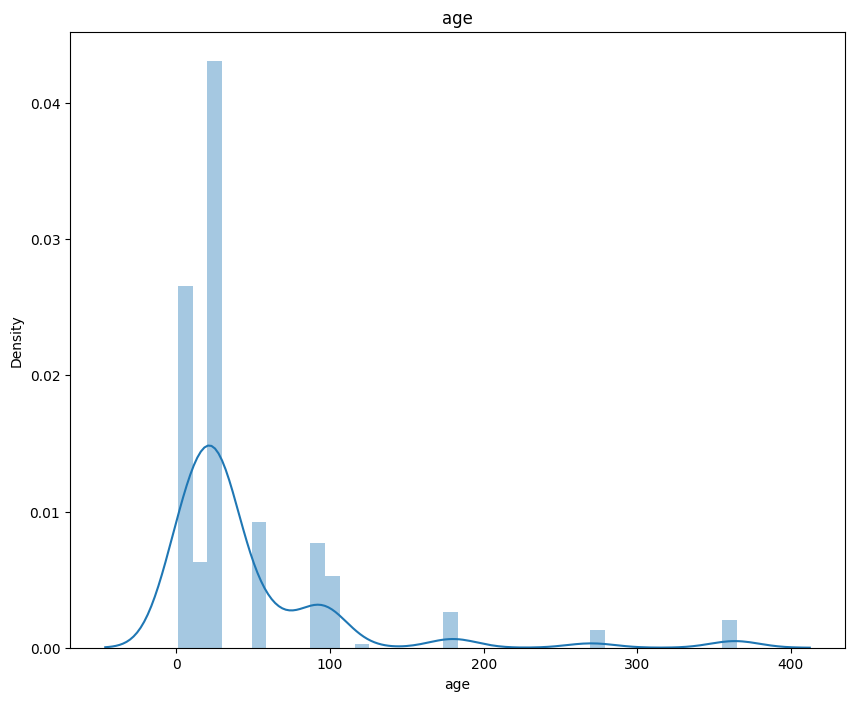

In [26]:
sns.boxplot(x='age',data=df,orient='h')
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title('age')

#Ash

In [27]:
Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['ash']))

1st quartile (Q1 is:) 0.0
2nd quartile(Q3) is: 118.3
interquartile range(iqr) is  118.3


In [28]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in ash",L_outliers)
print("upper outlier limit in ash",U_outliers)

lower outlier limit in ash -177.45
upper outlier limit in ash 177.45


In [29]:
print("the number of outlier in slag upper :",df[df['ash']>80.5]['ash'].count())
print("the number of outlier in slag lower :",df[df['ash']<-66.5]['ash'].count())

the number of outlier in slag upper : 423
the number of outlier in slag lower : 0


<ipython-input-30-9af09b4100ce>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash']).set_title('ash')


Text(0.5, 1.0, 'ash')

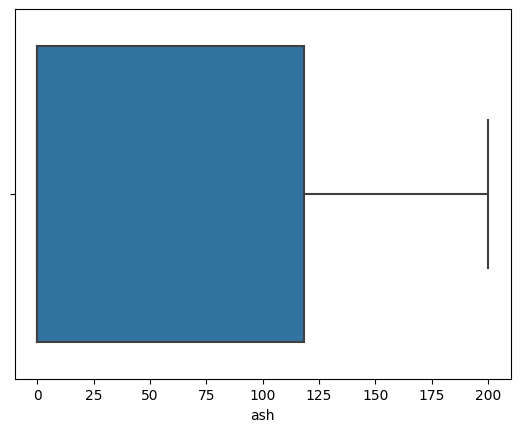

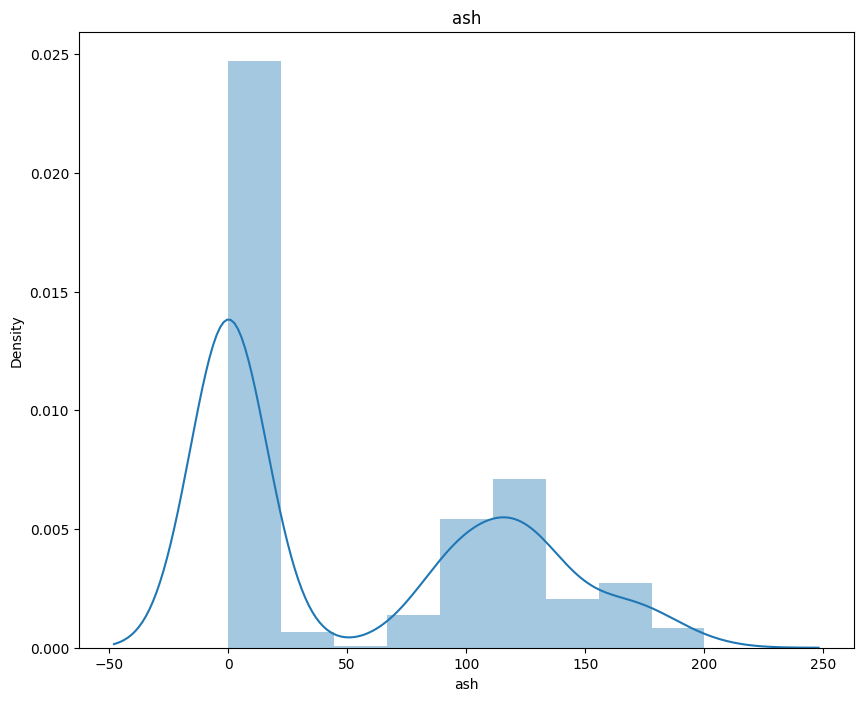

In [30]:
sns.boxplot(x='ash',data=df,orient='h')
plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('ash')

#superplastic

In [31]:
Q1=df['superplastic'].quantile(q=0.25)
Q3=df['superplastic'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['superplastic']))

1st quartile (Q1 is:) 0.0
2nd quartile(Q3) is: 10.2
interquartile range(iqr) is  10.2


In [32]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in superplastic",L_outliers)
print("upper outlier limit in superplastic",U_outliers)

lower outlier limit in superplastic -15.299999999999999
upper outlier limit in superplastic 15.299999999999999


In [33]:
print("the number of outlier in slag upper :",df[df['superplastic']>15.2999]['superplastic'].count())
print("the number of outlier in slag lower :",df[df['superplastic']<-15.299]['superplastic'].count())

the number of outlier in slag upper : 61
the number of outlier in slag lower : 0


<ipython-input-34-15010242ede7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['superplastic']).set_title('superplastic')


Text(0.5, 1.0, 'superplastic')

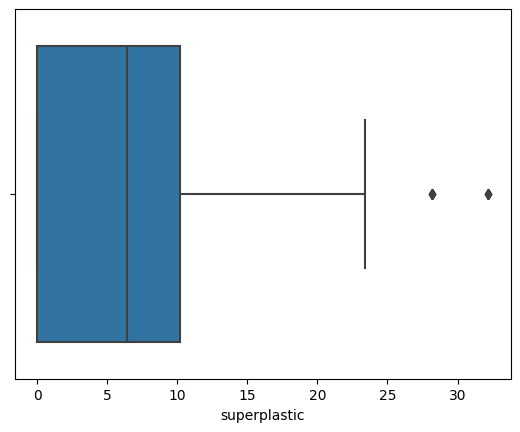

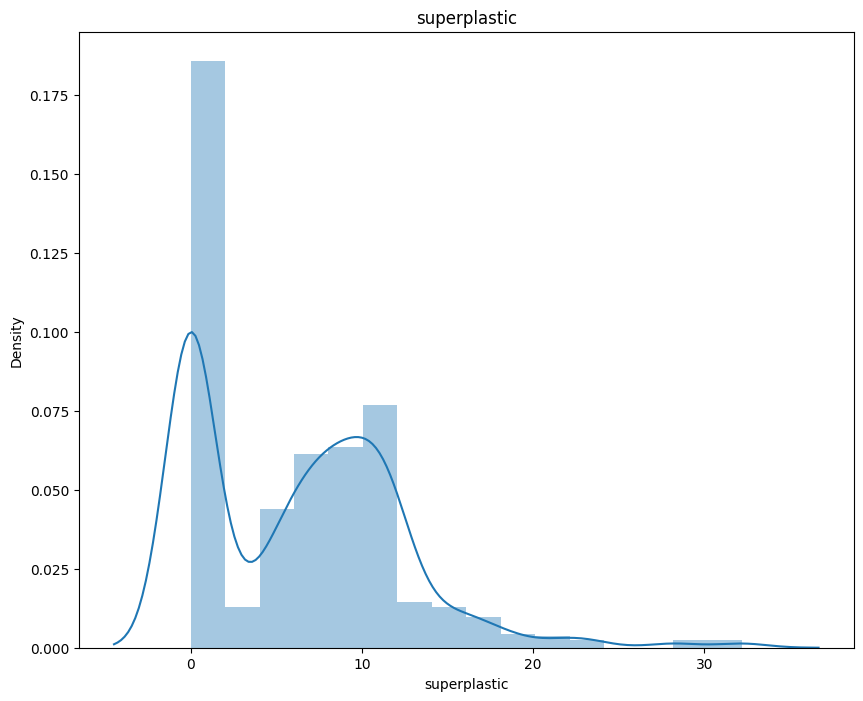

In [34]:
sns.boxplot(x='superplastic',data=df,orient='h')
plt.figure(figsize=(10,8))
sns.distplot(df['superplastic']).set_title('superplastic')

#coarse agg

In [35]:
Q1=df['coarseagg'].quantile(q=0.25)
Q3=df['coarseagg'].quantile(q=0.75)
print('1st quartile (Q1 is:)',Q1)
print('2nd quartile(Q3) is:',Q3)
print('interquartile range(iqr) is ',stats.iqr(df['coarseagg']))

1st quartile (Q1 is:) 932.0
2nd quartile(Q3) is: 1029.4
interquartile range(iqr) is  97.40000000000009


In [36]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q1+1.5*(Q3-Q1)
print("lower outlier limit in coarseagg",L_outliers)
print("upper outlier limit in coarseagg",U_outliers)

lower outlier limit in coarseagg 785.8999999999999
upper outlier limit in coarseagg 1078.1000000000001


<ipython-input-37-ed6151dfcb0b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['coarseagg']).set_title('coarseagg')


Text(0.5, 1.0, 'coarseagg')

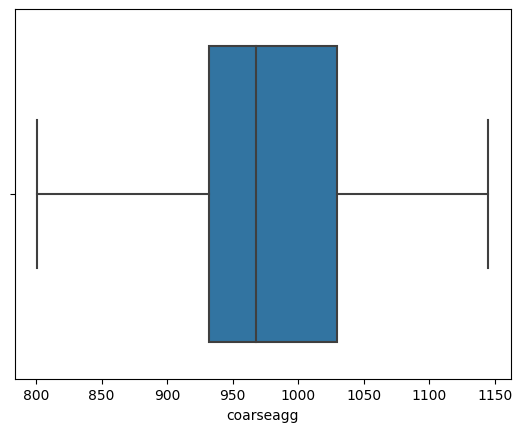

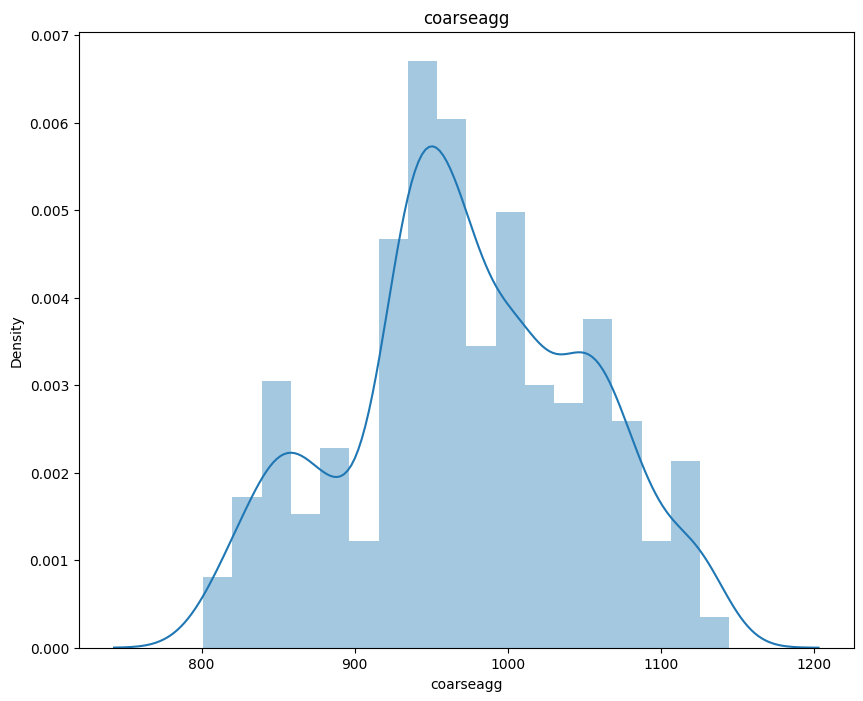

In [37]:
sns.boxplot(x='coarseagg',data=df,orient='h')
plt.figure(figsize=(10,8))
sns.distplot(df['coarseagg']).set_title('coarseagg')

#MultiVaariate Analysis

In [38]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fine_aggregate', 'age', 'strength'],
      dtype='object')

<ipython-input-39-e53c5d8a3c16>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cement'],ax=ax2[0][0])
<ipython-input-39-e53c5d8a3c16>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag'],ax=ax2[0][1])
<ipython-input-39-e53c5d8a3c16>:6: UserWarning: 

`distplot` is a deprecated funct

<Axes: xlabel='strength', ylabel='Density'>

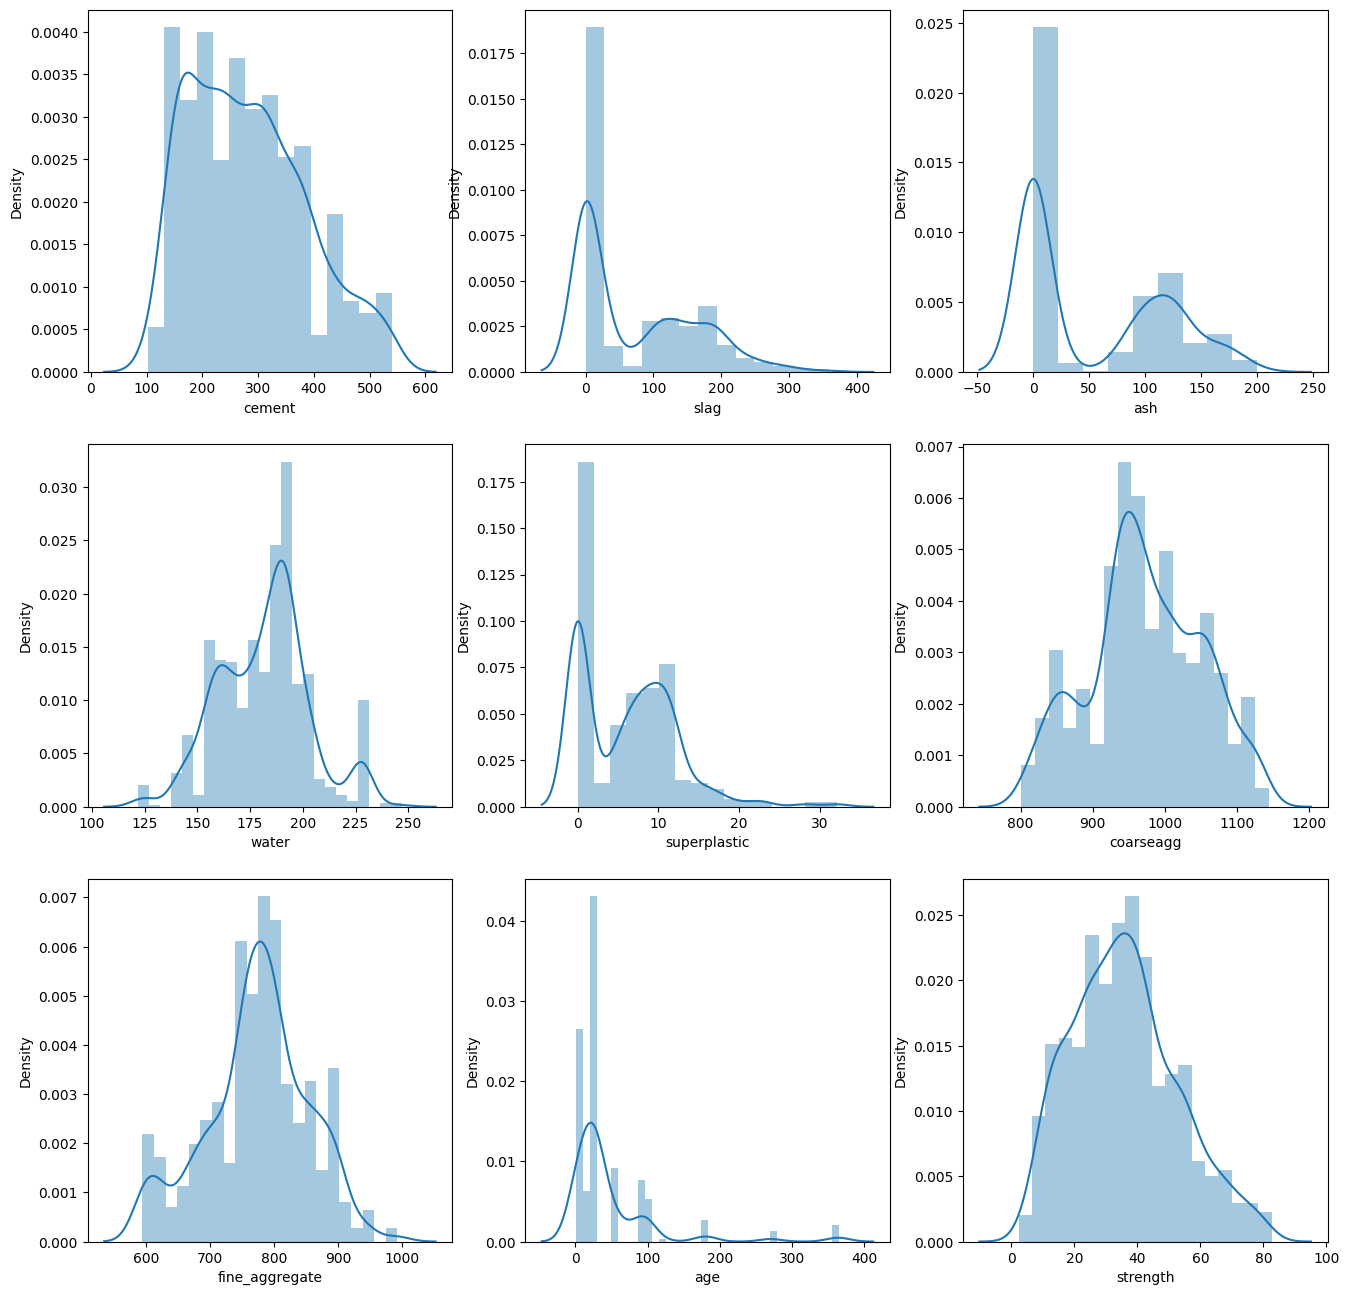

In [39]:
#Displot

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(df['cement'],ax=ax2[0][0])
sns.distplot(df['slag'],ax=ax2[0][1])
sns.distplot(df['ash'],ax=ax2[0][2])
sns.distplot(df['water'],ax=ax2[1][0])
sns.distplot(df['superplastic'],ax=ax2[1][1])
sns.distplot(df['coarseagg'],ax=ax2[1][2])
sns.distplot(df['fine_aggregate'],ax=ax2[2][0])
sns.distplot(df['age'],ax=ax2[2][1])
sns.distplot(df['strength'],ax=ax2[2][2])

#Pairplot

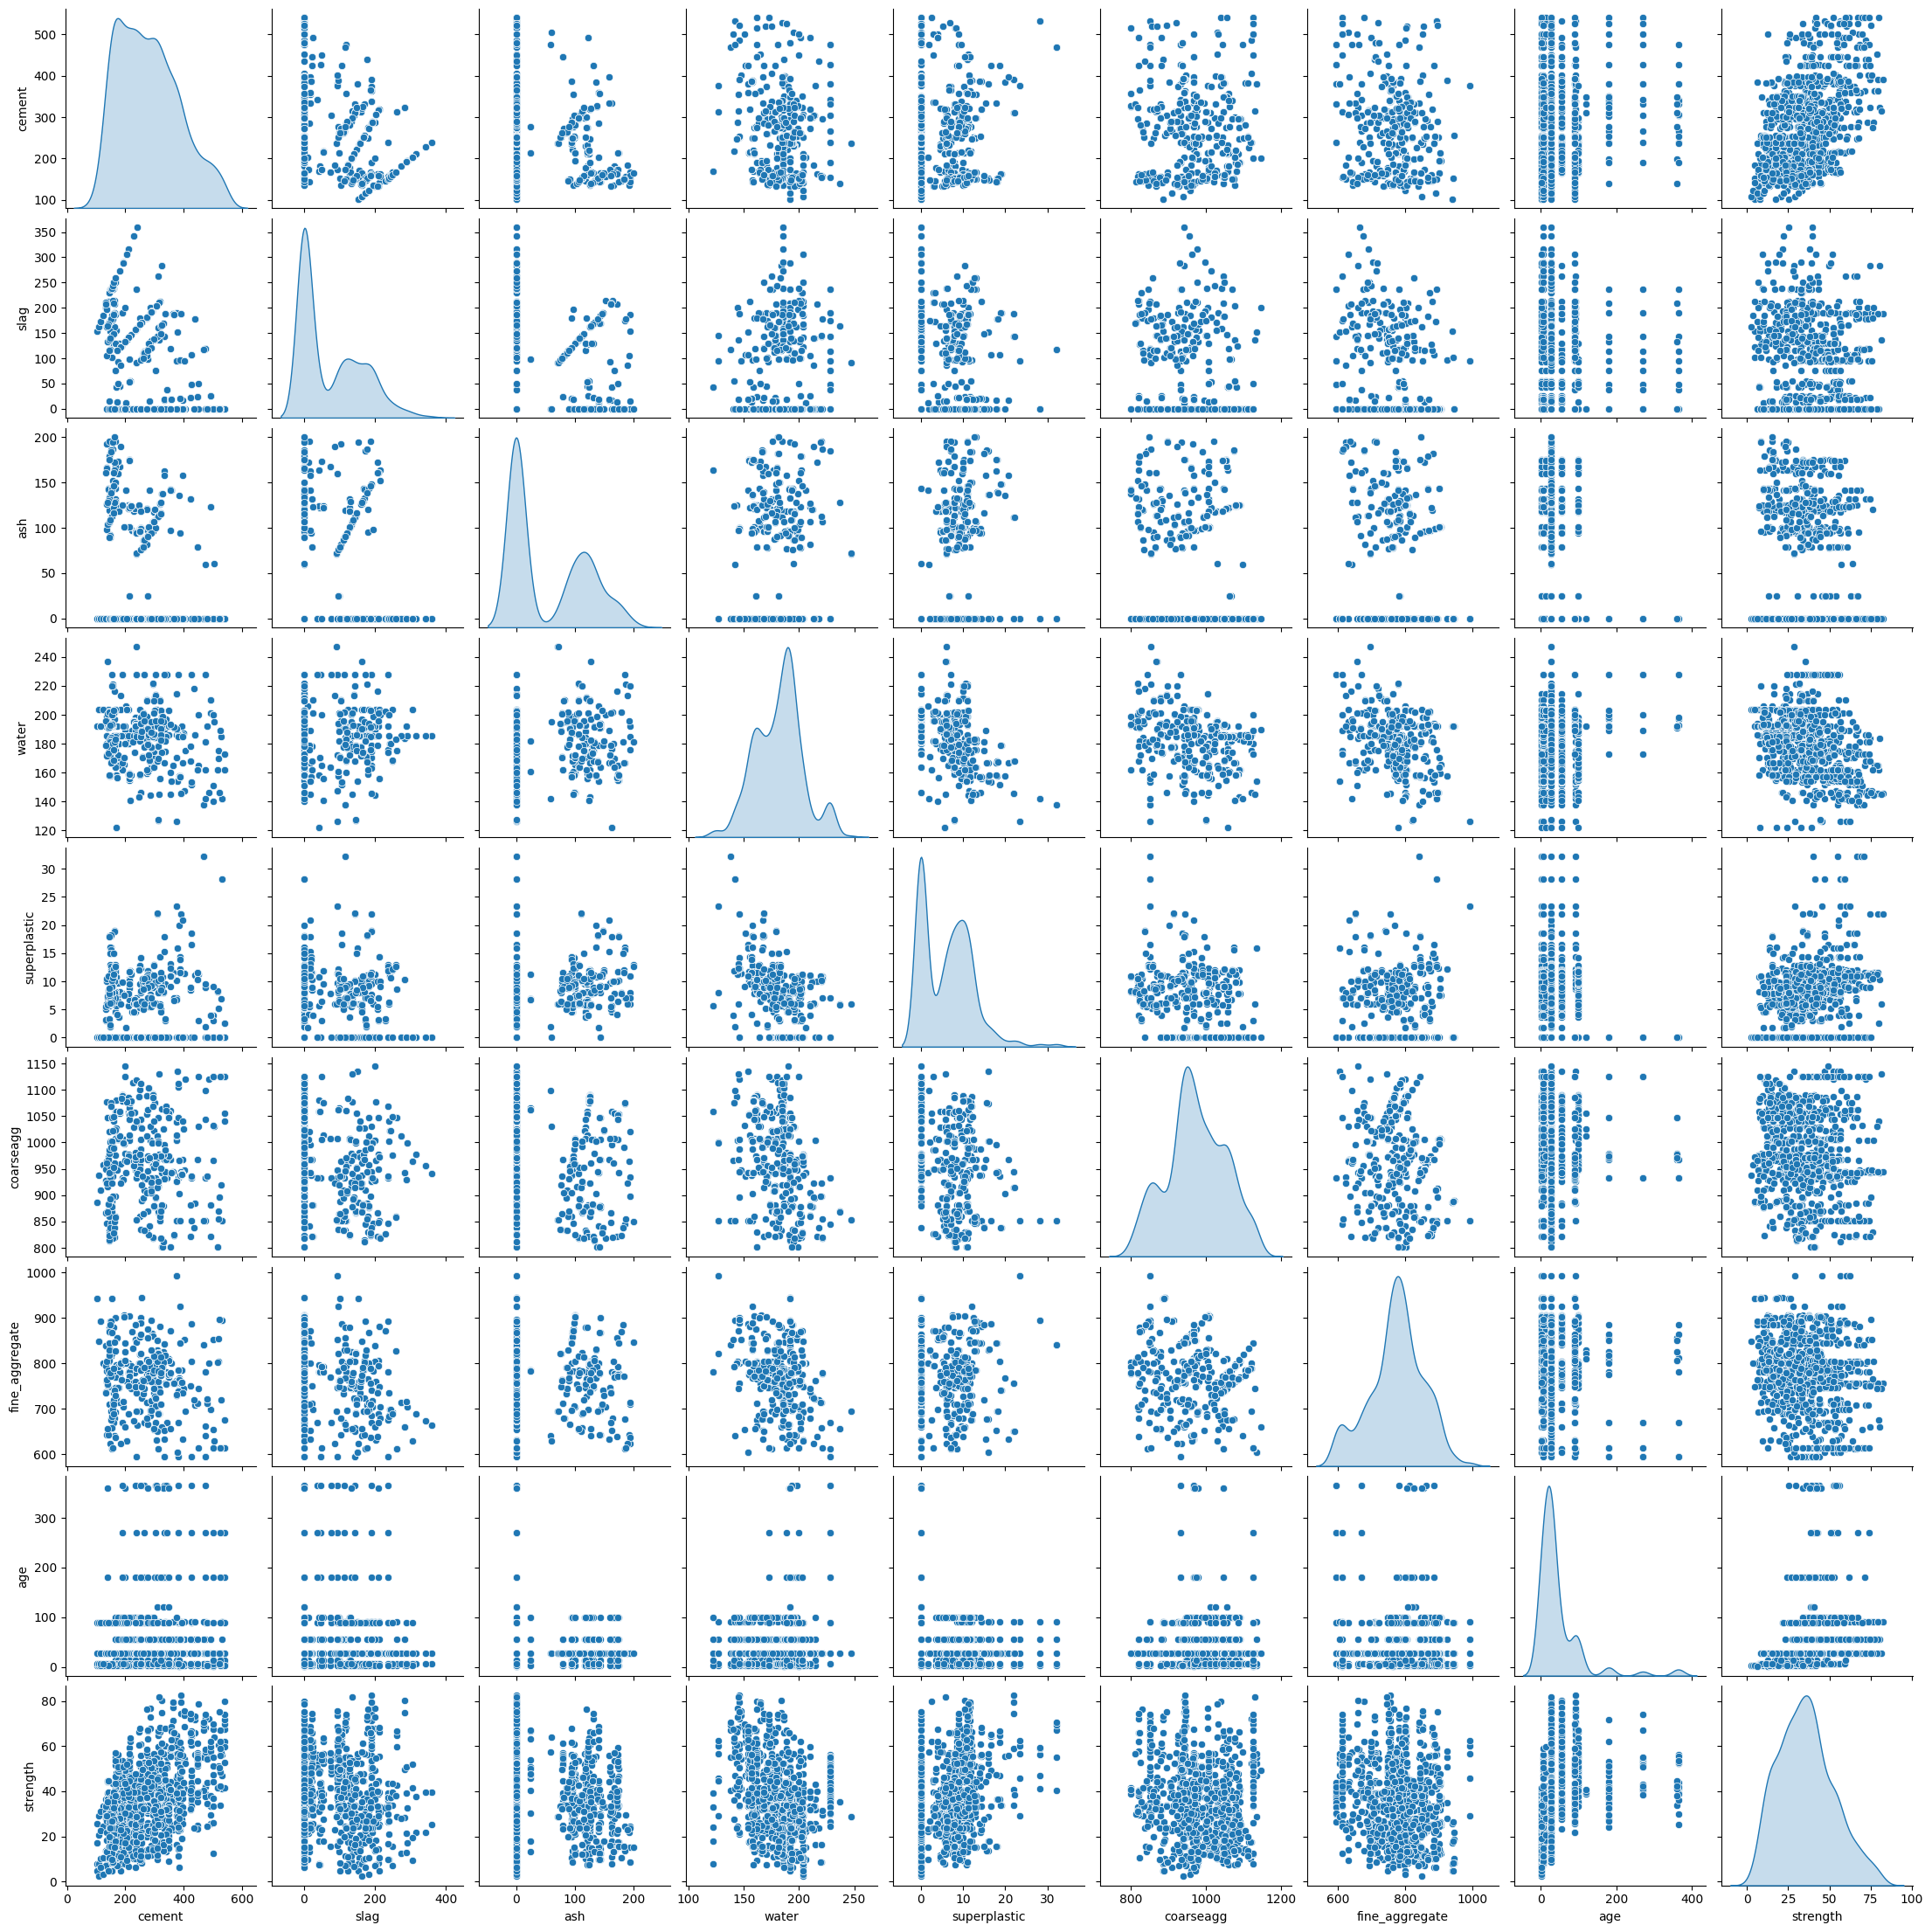

In [40]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

#Correlation between variables

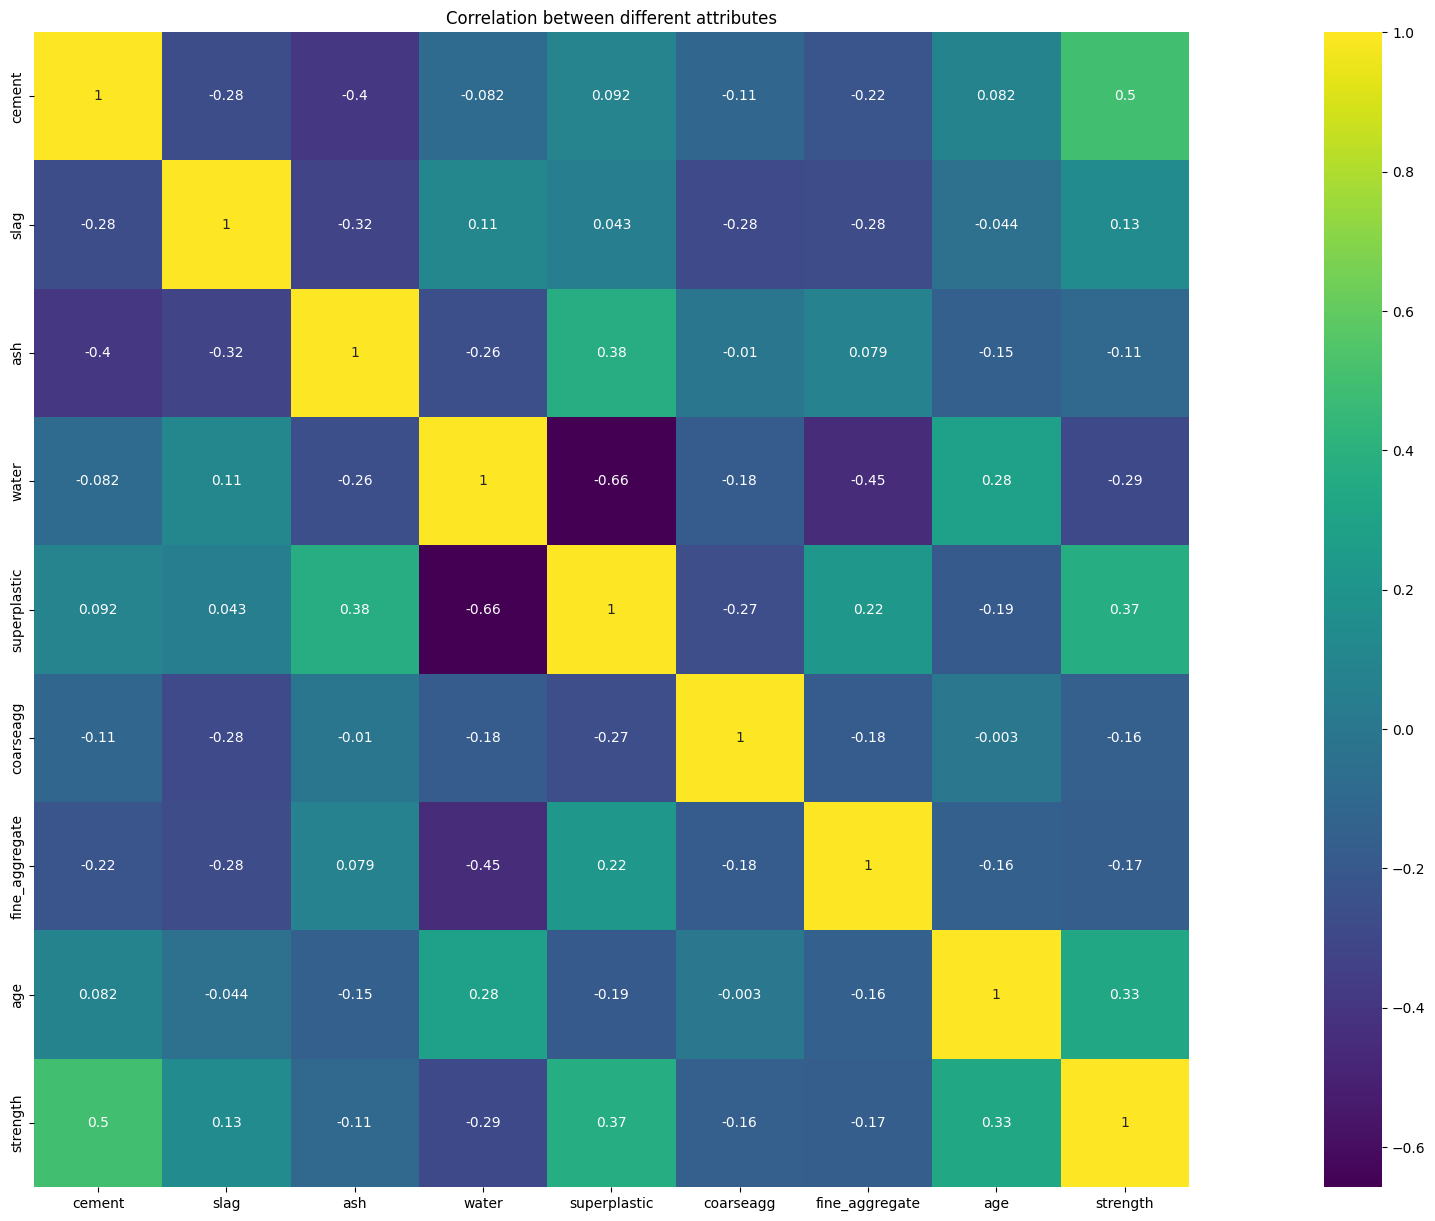

In [41]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<Axes: >

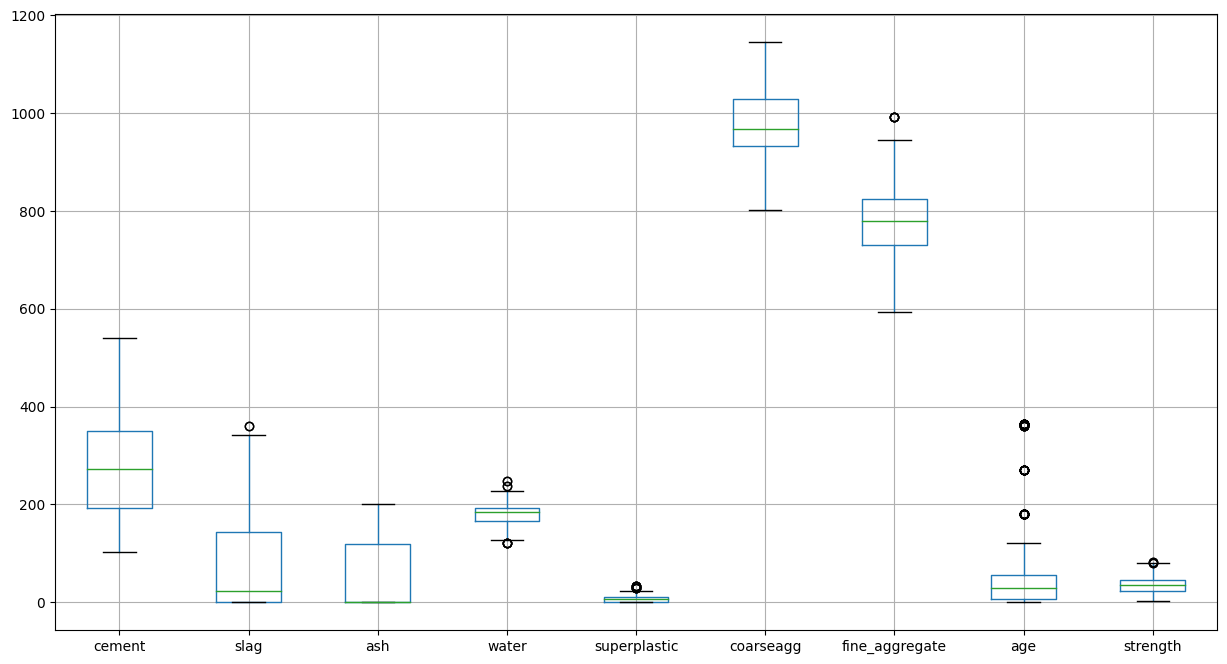

In [42]:
df.boxplot(figsize=(15,8))

#Checking for outliers

In [43]:
df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [44]:
print('Outliers in cement: ', df[((df.cement - df.cement.mean())/df.cement.std()).abs()>3]['cement'].count())
print('Outliers in slag: ', df[((df.slag - df.slag.mean())/df.slag.std()).abs()>3]['slag'].count())
print('Outliers in ash: ', df[((df.ash - df.ash.mean())/df.ash.std()).abs()>3]['ash'].count())
print('Outliers in water: ', df[((df.Water - df.Water.mean())/df.Water.std()).abs()>3]['Water'].count())
print('Outliers in superplastic: ', df[((df.superplastic - df.superplastic.mean())/df.superplastic.std()).abs()>3]['superplastic'].count())
print('Outliers in coarseagg: ', df[((df.coarseagg - df.coarseagg.mean())/df.coarseagg.std()).abs()>3]['coarseagg'].count())
print('Outliers in fineagg: ', df[((df.fineagg - df.fineagg.mean())/df.fineagg.std()).abs()>3]['fineagg'].count())
print('Outliers in age: ', df[((df.age - df.age.mean())/df.age.std()).abs()>3]['age'].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplastic:  10
Outliers in coarseagg:  0
Outliers in fineagg:  0
Outliers in age:  33


#Replacing the outliers by median

In [45]:
for cols in df.columns[:-1]:
  Q1 = df[cols].quantile(0.25)
  Q3 = df[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  df.loc[(df[cols] < low) | (df[cols] > high), cols] = df[cols].median()

#Feature Engineering and Model Building


In [46]:
df.head()

,cement,slag,ash,Water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


In [47]:
#independent and dependent variables
X = df.drop('strength', axis = 1)
y = df['strength']

In [48]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

#Building different Models

##Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [51]:
Ry_pred = model.predict(X_test)

In [52]:
model.score(X_train, y_train)

0.9810995650469024

In [53]:
model.score(X_test, y_test)

0.8766458461865887

In [54]:
from sklearn.metrics import r2_score

acc_R = r2_score(y_test, Ry_pred)
print("R2_SCORE",acc_R)


R2_SCORE 0.8766458461865887


In [55]:

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, Ry_pred)
print("MSE-",mse)


MSE- 32.33201174270337


In [56]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, Ry_pred)
rmse = np.sqrt(mse)
print("RMSE-",rmse)


RMSE- 5.686124492367659


In [57]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Ry_pred)
print("MAE-",mae)


MAE- 4.073534404038066


In [58]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, Ry_pred))
print("RMSLE-",rmsle)


RMSLE- 0.17061119971660074


In [59]:
import pandas as pd

results_1 = pd.DataFrame({'Algorithm': ['Random Forest'], 'accuracy': [acc_R]})
results = results_1[['Algorithm', 'accuracy']]
print(results)


       Algorithm  accuracy
0  Random Forest  0.876646


#KFold Cross Validation

In [60]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k = 20
kfold = KFold(n_splits=k, shuffle=True)  # Shuffle is set to True

K_results = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(K_results))
print(accuracy)



0.9080556837298932


In [61]:
random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy})
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056


#Gradient Boosting Regressor

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

Gmodel = GradientBoostingRegressor()
Gmodel.fit(X_train, y_train)


GradientBoostingRegressor()

In [63]:
Gy_pred = Gmodel.predict(X_test)

In [64]:
Gmodel.score(X_train, y_train)

0.9477368610390589

In [65]:
Gmodel.score(X_test, y_test)

0.8802931429504723

In [66]:
from sklearn.metrics import r2_score

# Assuming you have already trained the model and obtained y_pred
acc_G = r2_score(y_test, Gy_pred)
print("R2-squared Score for Gradient Boosting:", acc_G)


R2-squared Score for Gradient Boosting: 0.8802931429504723


In [67]:

from sklearn.metrics import mean_squared_error

# Assuming you have already trained the model and obtained y_pred
mse = mean_squared_error(y_test, Gy_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 31.376029003951135


In [68]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Gy_pred)
print("MAE-",mae)


MAE- 4.20898247812931


In [69]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, Gy_pred)
rmse = np.sqrt(mse)
print("RMSE-",rmse)


RMSE- 5.601430978236824


In [70]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, Gy_pred))
print("RMSE-",rmsle)


RMSE- 0.17458043126741232


In [71]:
gradient_re = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor'], 'accuracy': acc_G})
results = pd.concat([results, gradient_re])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293


In [72]:
k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=70)  # Set shuffle to True

results_3 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_3))
print("Cross-validated Accuracy:", accuracy)


Cross-validated Accuracy: 0.9084534189610813


In [73]:
gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453


#Ada Boost Regressor

In [74]:
from sklearn.ensemble import AdaBoostRegressor

In [75]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor()

In [76]:
Ay_pred = model.predict(X_test)

In [77]:
#Model Performance on Test Data, NB: check on train data

model.score(X_test, y_test)

0.7589490846853401

In [78]:
from sklearn.metrics import r2_score

# Assuming you have already trained the model and obtained y_pred
acc_Ada = r2_score(y_test, Ay_pred)
print("R-squared Score for Gradient Boosting:",acc_Ada)

R-squared Score for Gradient Boosting: 0.7589490846853401


In [79]:
from sklearn.metrics import mean_squared_error

# Assuming you have already trained the model and obtained y_pred
mse = mean_squared_error(y_test, Ay_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 63.18118023274572


In [80]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, Ay_pred)
rmse = np.sqrt(mse)
print("RMSE-",rmse)


RMSE- 7.948659021039066


In [81]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Ay_pred)
print("MAE-",mae)


MAE- 6.573165171107885


In [82]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, Ay_pred))
print("RMSLE-",rmsle)


RMSLE- 0.2692913164378993


In [83]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': acc_Ada})
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949


#K fold cross Validation for Ada Boost

In [84]:
k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=70)  # Set shuffle to True

results_4 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_4))
print("Cross-validated Accuracy:", accuracy)


Cross-validated Accuracy: 0.7785218374092946


In [85]:
#Store the accuracy results for each model in a dataframe for final comparison

acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522


#KNN Regressor

In [86]:
#Checking for different values of neighbors to determine K
from sklearn.neighbors import KNeighborsRegressor


diff_k=[]
for i in range(1,45):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  diff_k.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean errors')

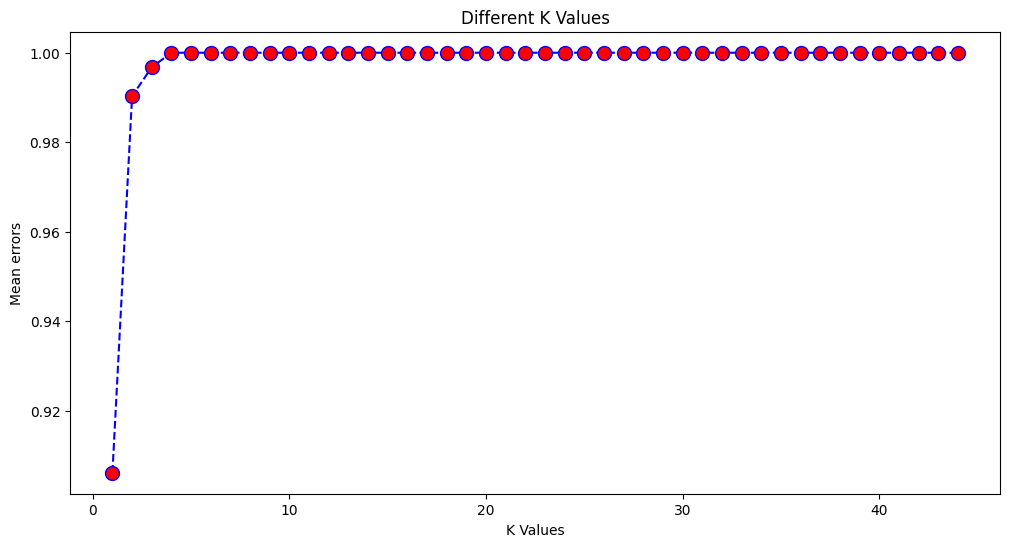

In [87]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [88]:
#k=3 is a better choice from the above plot

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [89]:
ky_pred = model.predict(X_test)

In [90]:
model.score(X_train, y_train)

0.9072386489998584

In [91]:
from sklearn.metrics import r2_score

# Assuming you have already trained the model and obtained y_pred
acc_KNN = r2_score(y_test, ky_pred)
print("R-squared Score for KNN:", acc_KNN)


R-squared Score for KNN: 0.7541705172196024


In [92]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, ky_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 64.43367716648686


In [93]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, ky_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 8.027059060857024


In [94]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, ky_pred)
print("MAE-",mae)


MAE- 5.842524271844659


In [95]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, ky_pred))
print("RMSLE:", rmsle)


RMSLE: 0.24429918956306004


In [96]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [acc_KNN]})
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171


#KFold Validation

In [97]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=70)

results_5 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_5))
print("Cross-validated Accuracy:", accuracy)


Cross-validated Accuracy: 0.7057971335001951


In [98]:

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797


#Bagging Reggressor

In [99]:
from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor()
model.fit(X_train,y_train)

BaggingRegressor()

In [100]:
By_pred = model.predict(X_test)

In [101]:
model.score(X_train, y_train)

0.9754300792118271

In [102]:
model.score(X_test, y_test)

0.8660974558162089

In [103]:
from sklearn.metrics import r2_score

# Assuming you have already trained the model and obtained y_pred
acc_BR = r2_score(y_test, By_pred)
print("R-squared Score for Bagging Regressor:", acc_BR)


R-squared Score for Bagging Regressor: 0.8660974558162089


In [104]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, By_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 35.09682079678371


In [105]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, By_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 5.924256982675862


In [106]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, By_pred)
print("MAE:", mae)


MAE: 4.20275891508707


In [107]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, By_pred))
print("RMSLE:", rmsle)


RMSLE: 0.18016058291268264


In [108]:

Bagging_df = pd.DataFrame({'Algorithm': ['Bagging Regressor'], 'accuracy': acc_BR})
results = pd.concat([results, Bagging_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797
0,Bagging Regressor,0.866097


#KFold Validation

In [109]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

k = 20
kfold = KFold(n_splits=k, shuffle=True, random_state=70)  # Set shuffle to True

results_7 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(abs(results_7))
print("Cross-validated Accuracy:", accuracy)



Cross-validated Accuracy: 0.8927617166888137


In [110]:
#Store the accuracy results for each model in a dataframe for final comparison

BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797
0,Bagging Regressor,0.866097
0,Bagging Regressor k fold,0.892762


#Support Vector Regressor

In [111]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [112]:
Sy_pred = model.predict(X_test)

In [113]:
model.score(X_train, y_train)

0.7296525761559518

In [114]:
from sklearn.metrics import r2_score

# Assuming you have already trained the model and obtained y_pred
acc_SVR = r2_score(y_test, Sy_pred)
print("R-squared Score for Support Vector Regressor:", acc_SVR)


R-squared Score for Support Vector Regressor: 0.6549962611822544


In [115]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, Sy_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 90.42796363067555


In [116]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, Sy_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 9.509361893979824


In [117]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Sy_pred)
print("MAE:", mae)


MAE: 7.206342368266353


In [118]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, Sy_pred))
print("RMSLE:", rmsle)


RMSLE: 0.2825091365713765


In [119]:

SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor'], 'accuracy': acc_SVR})
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797
0,Bagging Regressor,0.866097
0,Bagging Regressor k fold,0.892762


#KFold for SVR

In [120]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define your model, features (X), and target variable (y)
# model = YourModel()
# X = YourFeatures
# y = YourTargetVariable

k = 20
kfold = KFold(n_splits=k, shuffle=True)  # Set shuffle to True

results_8 = cross_val_score(model, X, y, cv=kfold)
accuracy = np.mean(results_8)
print("Cross-validated Accuracy:", accuracy)




Cross-validated Accuracy: 0.6931694354619429


In [121]:

SVRKFold_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor k fold'], 'accuracy': accuracy})
results = pd.concat([results, SVRKFold_df])
results = results[['Algorithm','accuracy']]
results

,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797
0,Bagging Regressor,0.866097
0,Bagging Regressor k fold,0.892762


#XGBoost Regressor

In [122]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics  # Import the 'metrics' module

xgr = XGBRegressor()

xgr.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [123]:
Xy_pred = xgr.predict(X_test)
xgr.score(X_train, y_train)


0.992400687042809

In [124]:
acc_XGB = metrics.r2_score(y_test, Xy_pred)  # Use the 'metrics' module to calculate R-squared
acc_XGB

0.8848170780709802

In [125]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()

xgr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [126]:
Xy_pred = xgr.predict(X_test)

In [127]:
xgr.score(X_train, y_train)

0.992400687042809

In [128]:
acc_XGB = metrics.r2_score(y_test, Xy_pred)  # Use the 'metrics' module to calculate R-squared
acc_XGB

0.8848170780709802

In [129]:
from sklearn.metrics import mean_squared_error

# Assuming you have already trained the model and obtained y_pred
mse = mean_squared_error(y_test, Xy_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 30.19027304099638


In [130]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, Xy_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 5.494567593632494


In [131]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Xy_pred)
print("MAE:", mae)


MAE: 3.790060650168113


In [132]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, Xy_pred))
print("RMSLE:", rmsle)


RMSLE: 0.15677058111148942


In [145]:

import pandas as pd

XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor'], 'accuracy': [acc_XGB]}, index=[13])  # Use index=[13] instead of index={'13'}
results = pd.concat([results, XGB_df])
results = results[['Algorithm', 'accuracy']]
results


,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797
0,Bagging Regressor,0.866097
0,Bagging Regressor k fold,0.892762


#DesionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor

dec_model = DecisionTreeRegressor()
dec_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [135]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_model.feature_importances_,columns=['Importance'],index=X_train.columns))

Feature importance: 
               Importance
cement          0.308518
slag            0.060248
ash             0.010639
Water           0.121169
superplastic    0.049510
coarseagg       0.026551
fineagg         0.050392
age             0.372972


In [136]:
Dy_pred = dec_model.predict(X_test)

In [137]:
dec_model.score(X_train, y_train)

0.9930841416603411

In [138]:
dec_model.score(X_test, y_test)

0.7595513524303861

In [139]:
acc_DT=metrics.r2_score(y_test,Dy_pred)
acc_DT

0.7595513524303861

In [140]:
from sklearn.metrics import mean_squared_error

# Assuming you have already trained the model and obtained y_pred
mse = mean_squared_error(y_test, Dy_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 63.0233215210356


In [141]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, Dy_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 7.938722914993041


In [142]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, Dy_pred)
print("MAE:", mae)


MAE: 5.3900323624595465


In [143]:
from sklearn.metrics import mean_squared_log_error
import numpy as np

# Assuming y_test and y_pred are the true and predicted values respectively
rmsle = np.sqrt(mean_squared_log_error(y_test, Dy_pred))
print("RMSLE:", rmsle)


RMSLE: 0.22492702462208125


In [144]:


DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 1'], 'accuracy': [acc_DT]}, index=[14])  # Use index=[14] instead of index={'14'}
results = pd.concat([results, DT_df])
results = results[['Algorithm', 'accuracy']]
results


,Algorithm,accuracy
0,Random Forest,0.876646
0,Random Forest Regressor k_fold,0.908056
0,Gradient Boost Regressor,0.880293
0,Gradient Boost Regressor k fold,0.908453
0,Ada Boost Regressor,0.758949
0,Ada Boost Regressor k fold,0.778522
0,KNN Regressor,0.754171
0,KNN Regressor k fold,0.705797
0,Bagging Regressor,0.866097
0,Bagging Regressor k fold,0.892762
